<a href="https://colab.research.google.com/github/avantgarde-cy/Netflix_Analysis/blob/master/sh_data_preprocessing_and_visualization(2)_0714.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 불러오기 

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
use_df = pd.read_csv('use_df.csv', encoding = 'unicode_escape')

## 2.VALUE & IMDb Score 분석 

In [3]:
use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2960 non-null   int64  
 1   Title                  2960 non-null   object 
 2   Series or Movie        2960 non-null   object 
 3   COUNTRY                2754 non-null   object 
 4   Release Date           2895 non-null   object 
 5   GENRE                  2590 non-null   object 
 6   VALUE                  2960 non-null   int64  
 7   Genre_all              2842 non-null   object 
 8   Tags                   2951 non-null   object 
 9   Languages              2811 non-null   object 
 10  Hidden Gem Score       2808 non-null   float64
 11  Country Availability   2955 non-null   object 
 12  Runtime                2960 non-null   object 
 13  Director               2247 non-null   object 
 14  Writer                 2446 non-null   object 
 15  Acto

In [4]:
use_df.head(2)

,Unnamed: 0,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",4.3,"Lithuania,Canada,Australia,Poland,Mexico,Franc...",< 30 minutes,Stephen Frears,Peter Morgan,"Alex Jennings, Roger Allam, James Cromwell, He...",PG-13,7.3,96.0,91.0,96.0,97.0,"$56,441,711",2020.10.23,"PathÃ© Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",1.6,"Poland,Russia,United Kingdom,Slovakia,Canada,G...",1-2 hour,"Tomasz Mandes, Barbara Bialowas","Blanka Lipinska, Tomasz Klimala, Barbara Bialo...","Michele Morrone, Otar Saralidze, Bronislaw Wro...",TV-MA,3.2,NaN,NaN,NaN,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0


**헤더 이름 정리**
- Series or Moive 를 Type으로 변환
- 스페이스 없게 변환

In [5]:
use_df = use_df.rename(columns={"IMDb Score":'IMDb_Score', "IMDb Votes":"IMDb_Votes", "Series or Movie":'Type'})
use_df.head(2)

,Unnamed: 0,Title,Type,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb_Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb_Votes
0,0,thequeensgambit,TV,United States,2020.10.23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",4.3,"Lithuania,Canada,Australia,Poland,Mexico,Franc...",< 30 minutes,Stephen Frears,Peter Morgan,"Alex Jennings, Roger Allam, James Cromwell, He...",PG-13,7.3,96.0,91.0,96.0,97.0,"$56,441,711",2020.10.23,"PathÃ© Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0
1,1,365days,Movie,Poland,2020.6.7,Romance,42149,"Drama, Romance","Polish Movies,Polish Dramas,Dramas,Romantic Dr...","Polish, English, Italian",1.6,"Poland,Russia,United Kingdom,Slovakia,Canada,G...",1-2 hour,"Tomasz Mandes, Barbara Bialowas","Blanka Lipinska, Tomasz Klimala, Barbara Bialo...","Michele Morrone, Otar Saralidze, Bronislaw Wro...",TV-MA,3.2,NaN,NaN,NaN,NaN,NaN,2020.4.2,NaN,A fiery executive in a spiritless relationship...,50125.0


#### **해당 데이터에서 쓰고자 하는 컬럼 외에 다른 것들 드랍**
VALUE와 IMDb_Score, GENRE만 사용

In [6]:
IMDB_base = use_df.drop(['Unnamed: 0','IMDb_Votes','COUNTRY','Tags','Country Availability','Languages','Hidden Gem Score', 'Runtime', 'Director', 'Writer', 'Actors','Metacritic Score','Awards Received','Awards Nominated For','Release Date','Production House','Runtime','Summary','View Rating','Rotten Tomatoes Score','Boxoffice','Netflix Release Date','Genre_all'], axis = 1)
IMDB_base

,Title,Type,GENRE,VALUE,IMDb_Score
0,thequeensgambit,TV,Drama,44867,7.3
1,365days,Movie,Romance,42149,3.2
2,emilyinparis,TV,Drama,27138,7.1
3,lucifer,TV,Superhero,25729,6.9
4,theumbrellaacademy,TV,Superhero,23480,8.0
...,...,...,...,...,...
2955,thebournesupremacy,Movie,Action,1,7.7
2956,justfriends,Movie,Romance,1,6.2
2957,child44,Movie,Thriller,1,6.5
2958,draculauntold,Movie,Horror,1,6.3


**결측치 있는 항목 드랍**

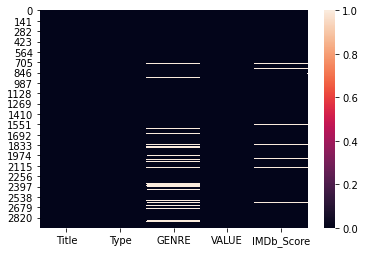

In [7]:
sns.heatmap(IMDB_base.isnull())

In [8]:
IMDB_base = IMDB_base.dropna(subset=['IMDb_Score'])
IMDB_base

,Title,Type,GENRE,VALUE,IMDb_Score
0,thequeensgambit,TV,Drama,44867,7.3
1,365days,Movie,Romance,42149,3.2
2,emilyinparis,TV,Drama,27138,7.1
3,lucifer,TV,Superhero,25729,6.9
4,theumbrellaacademy,TV,Superhero,23480,8.0
...,...,...,...,...,...
2955,thebournesupremacy,Movie,Action,1,7.7
2956,justfriends,Movie,Romance,1,6.2
2957,child44,Movie,Thriller,1,6.5
2958,draculauntold,Movie,Horror,1,6.3


#### **형 변환**

점수대 별 VALUE(Viewpoints)를 확인하기 위해 IMDb_Score 형변환한 데이터 별도 생성 (int_score)

In [9]:
int_score = IMDB_base.copy()
int_score

,Title,Type,GENRE,VALUE,IMDb_Score
0,thequeensgambit,TV,Drama,44867,7.3
1,365days,Movie,Romance,42149,3.2
2,emilyinparis,TV,Drama,27138,7.1
3,lucifer,TV,Superhero,25729,6.9
4,theumbrellaacademy,TV,Superhero,23480,8.0
...,...,...,...,...,...
2955,thebournesupremacy,Movie,Action,1,7.7
2956,justfriends,Movie,Romance,1,6.2
2957,child44,Movie,Thriller,1,6.5
2958,draculauntold,Movie,Horror,1,6.3


In [10]:
int_score['IMDb_Score'] = int_score['IMDb_Score'].astype('int')
int_score

,Title,Type,GENRE,VALUE,IMDb_Score
0,thequeensgambit,TV,Drama,44867,7
1,365days,Movie,Romance,42149,3
2,emilyinparis,TV,Drama,27138,7
3,lucifer,TV,Superhero,25729,6
4,theumbrellaacademy,TV,Superhero,23480,8
...,...,...,...,...,...
2955,thebournesupremacy,Movie,Action,1,7
2956,justfriends,Movie,Romance,1,6
2957,child44,Movie,Thriller,1,6
2958,draculauntold,Movie,Horror,1,6


In [11]:
IMDB_base.dtypes

Title          object
Type           object
GENRE          object
VALUE           int64
IMDb_Score    float64
dtype: object

#### **결측치 확인 및 제거**

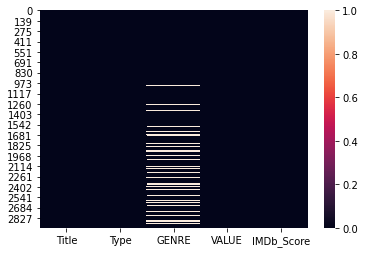

In [12]:
sns.heatmap(IMDB_base.isnull())

In [13]:
len(IMDB_base['VALUE'].unique())

895

In [14]:
IMDB_base['VALUE'].value_counts()

1       93
2       70
5       43
3       42
9       42
        ..
323      1
2370     1
313      1
303      1
2040     1
Name: VALUE, Length: 895, dtype: int64

#### **데이터 분포 확인**

IMDB SCORE - 평점은 5~7점대가 대부분

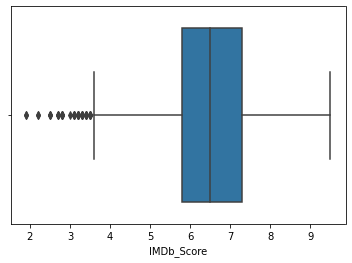

In [15]:
sns.boxplot(x=IMDB_base['IMDb_Score'])

Viewpoints - 편향됨

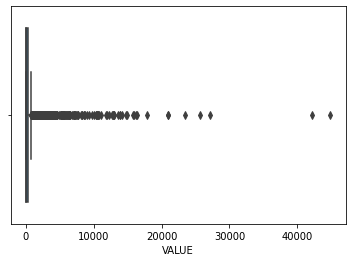

In [16]:
sns.boxplot(x=IMDB_base['VALUE'])

점수대 별 Viewpoint(VALUE)값 확인

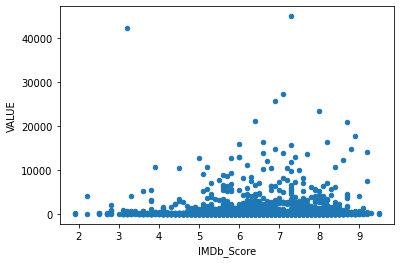

In [17]:
IMDB_base.plot.scatter(x="IMDb_Score",y="VALUE",s=20);

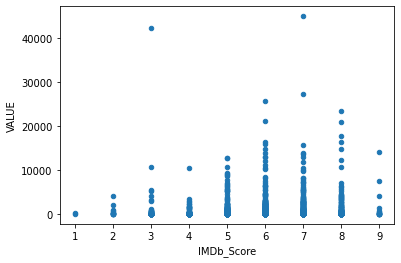

In [18]:
int_score.plot.scatter(x="IMDb_Score", y="VALUE", s =20); #점수대별 VALUE

#### 데이터 스케일링

**로그 스케일링**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Skewness: 0.223
Kurtosis: -0.292


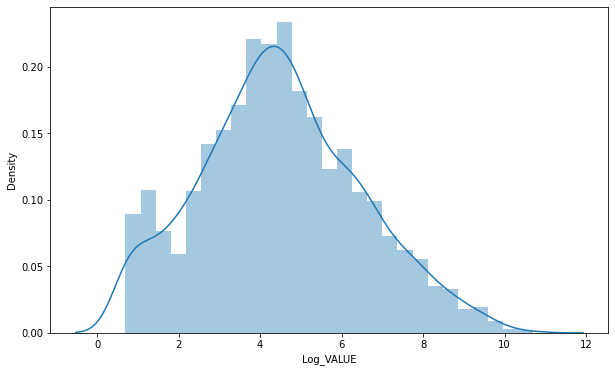

In [19]:
IMDB_base["Log_VALUE"] = np.log1p(IMDB_base["VALUE"])
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(IMDB_base["Log_VALUE"])
print("Skewness: {:.3f}".format(IMDB_base["Log_VALUE"].skew()))
print("Kurtosis: {:.3f}".format(IMDB_base["Log_VALUE"].kurt()))

In [20]:
IMDB_base

,Title,Type,GENRE,VALUE,IMDb_Score,Log_VALUE
0,thequeensgambit,TV,Drama,44867,7.3,10.711480
1,365days,Movie,Romance,42149,3.2,10.648990
2,emilyinparis,TV,Drama,27138,7.1,10.208727
3,lucifer,TV,Superhero,25729,6.9,10.155413
4,theumbrellaacademy,TV,Superhero,23480,8.0,10.063947
...,...,...,...,...,...,...
2955,thebournesupremacy,Movie,Action,1,7.7,0.693147
2956,justfriends,Movie,Romance,1,6.2,0.693147
2957,child44,Movie,Thriller,1,6.5,0.693147
2958,draculauntold,Movie,Horror,1,6.3,0.693147


In [21]:
IMDB_log = IMDB_base.drop(['VALUE'], axis = 1)

In [22]:
IMDB_log = IMDB_log.round(decimals=3)

**VALUE 값이 없는 콘텐츠 드랍**

In [23]:
IMDB_log = IMDB_log.loc[(IMDB_log.Log_VALUE >= 1 )]
IMDB_log

,Title,Type,GENRE,IMDb_Score,Log_VALUE
0,thequeensgambit,TV,Drama,7.3,10.711
1,365days,Movie,Romance,3.2,10.649
2,emilyinparis,TV,Drama,7.1,10.209
3,lucifer,TV,Superhero,6.9,10.155
4,theumbrellaacademy,TV,Superhero,8.0,10.064
...,...,...,...,...,...
2858,astroboy,Movie,Action,6.3,1.099
2859,totalrecall,Movie,Science Fiction,6.3,1.099
2860,suckerpunch,Movie,Fantasy,6.0,1.099
2861,theadventuresoftintin,Movie,Adventure,7.3,1.099


#### **Movie_base**

---- Type 중에서 Movie만 남기기**

In [24]:
movie_base = IMDB_log.loc[(IMDB_log.Type == 'Movie')]
movie_base

,Title,Type,GENRE,IMDb_Score,Log_VALUE
1,365days,Movie,Romance,3.2,10.649
8,enolaholmes,Movie,Drama,6.6,9.707
10,thechristmaschroniclesparttwo,Movie,Comedy,6.0,9.675
12,holidate,Movie,Comedy,6.9,9.605
15,theoldguard,Movie,Superhero,6.6,9.541
...,...,...,...,...,...
2857,hachiadogstale,Movie,Drama,8.1,1.099
2858,astroboy,Movie,Action,6.3,1.099
2859,totalrecall,Movie,Science Fiction,6.3,1.099
2860,suckerpunch,Movie,Fantasy,6.0,1.099


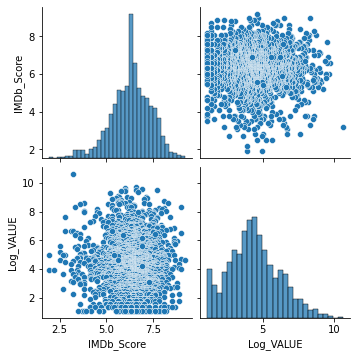

In [25]:
sns.pairplot(data = movie_base)

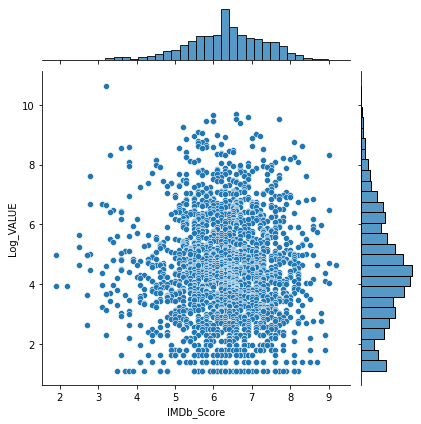

In [26]:
sns.jointplot(x="IMDb_Score", y="Log_VALUE", data=movie_base, kind="scatter");

#### **Movie 데이터에서 IMDb 와 VALUE(points)와 상관관계**

In [27]:
movie_corr = movie_base.corr()
movie_corr

,IMDb_Score,Log_VALUE
IMDb_Score,1.000000,-0.025193
Log_VALUE,-0.025193,1.000000


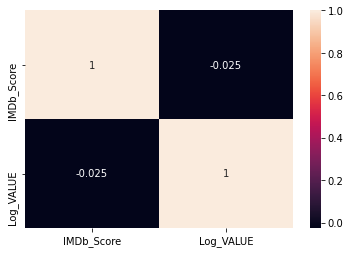

In [28]:
sns.heatmap(movie_corr, annot=True)

#### **tv_base**

---- Type 중에서 TV만 남기기** 

전처리 과정은 위와 동일

In [29]:
tv_base = IMDB_log.loc[(IMDB_log.Type == 'TV')]
tv_base

,Title,Type,GENRE,IMDb_Score,Log_VALUE
0,thequeensgambit,TV,Drama,7.3,10.711
2,emilyinparis,TV,Drama,7.1,10.209
3,lucifer,TV,Superhero,6.9,10.155
4,theumbrellaacademy,TV,Superhero,8.0,10.064
5,darkdesire,TV,Drama,6.4,9.953
...,...,...,...,...,...
2816,thelandofhypocrisy,TV,Comedy,6.7,1.099
2820,webarebears,TV,Animation,6.8,1.099
2821,paradisepd,TV,Animation,6.9,1.099
2853,theunderclass,TV,Drama,6.4,5.932


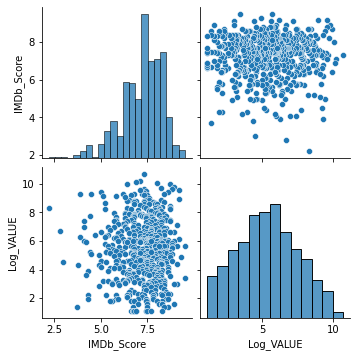

In [30]:
sns.pairplot(data = tv_base)

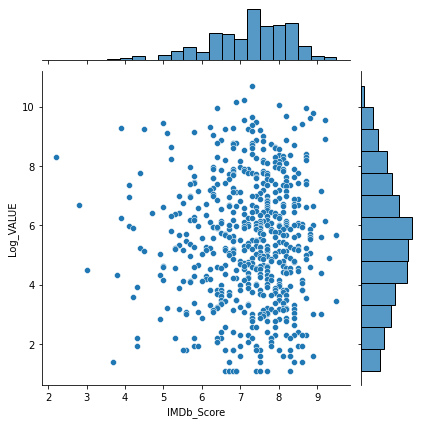

In [31]:
sns.jointplot(x="IMDb_Score", y="Log_VALUE", data=tv_base, kind="scatter");

#### **TV shows 중 IMDb 와 VALUE(points)와 상관관계** 

In [32]:
tv_corr = tv_base.corr()
tv_corr

,IMDb_Score,Log_VALUE
IMDb_Score,1.000000,-0.002837
Log_VALUE,-0.002837,1.000000


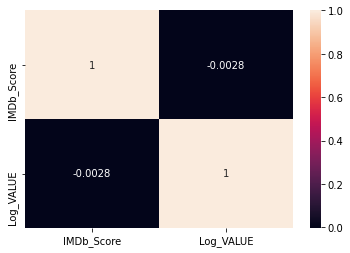

In [33]:
sns.heatmap(tv_corr, annot=True)

## 2.결과 ***TV shows 와 Movie 상관없이  Value와 IMDb Score은 관계가 없다***

+ 추가 사항

TV shows와 Moive가 합쳐져 있는 IMDB_log 데이터로 보아도 역시 관계가 없다

In [34]:
IMDB_log_corr = IMDB_log.corr()
IMDB_log_corr

,IMDb_Score,Log_VALUE
IMDb_Score,1.000000,0.053368
Log_VALUE,0.053368,1.000000


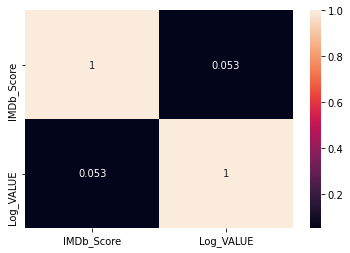

In [35]:
sns.heatmap(IMDB_log_corr, annot=True)

**| 평점대별 VALUE(Viewpoint)분포**

In [36]:
fig = px.scatter(int_score, x='IMDb_Score', y='VALUE', color='Type', hover_data=['Title'])
fig.show()

## 3.Genre 와 IMDb 살펴보기

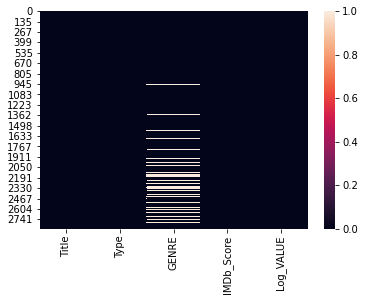

In [37]:
sns.heatmap(IMDB_log.isnull())

In [38]:
IMDB_log = IMDB_log.dropna(subset=['GENRE']) #장르가 없을 경우 드랍

In [39]:
IMDB_log = IMDB_log.replace('Animated', 'Animation') #animated와 animation 합치기

#### Moive

In [40]:
movie_base = IMDB_log.loc[(IMDB_log.Type == 'Movie')]
movie_base

,Title,Type,GENRE,IMDb_Score,Log_VALUE
1,365days,Movie,Romance,3.2,10.649
8,enolaholmes,Movie,Drama,6.6,9.707
10,thechristmaschroniclesparttwo,Movie,Comedy,6.0,9.675
12,holidate,Movie,Comedy,6.9,9.605
15,theoldguard,Movie,Superhero,6.6,9.541
...,...,...,...,...,...
2857,hachiadogstale,Movie,Drama,8.1,1.099
2858,astroboy,Movie,Action,6.3,1.099
2859,totalrecall,Movie,Science Fiction,6.3,1.099
2860,suckerpunch,Movie,Fantasy,6.0,1.099


In [41]:
movie_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 1 to 2861
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1895 non-null   object 
 1   Type        1895 non-null   object 
 2   GENRE       1895 non-null   object 
 3   IMDb_Score  1895 non-null   float64
 4   Log_VALUE   1895 non-null   float64
dtypes: float64(2), object(3)
memory usage: 88.8+ KB


**장르별 그룹핑**

In [42]:
movie_genre = movie_base.groupby("GENRE")
movie_genre.first()

,Title,Type,IMDb_Score,Log_VALUE
GENRE,,,,
Action,projectpower,Movie,6.0,9.473
Adventure,wecanbeheroes,Movie,8.1,8.245
Animation,thespongebobmoviespongeontherun,Movie,6.0,9.460
Biopic,unbroken,Movie,7.2,6.347
Comedy,thechristmaschroniclesparttwo,Movie,6.0,9.675
Concerts,arianagrandeexcusemeiloveyou,Movie,6.4,7.526
Crime,thebeast,Movie,5.7,8.549
Documentary,thesocialdilemma,Movie,7.7,9.517
Drama,enolaholmes,Movie,6.6,9.707


### **MOVIE 장르별 시각화**

| **MOVIE 장르별 Log_Value 분포**

In [43]:
fig = px.box(movie_base, x="GENRE", y="Log_VALUE", hover_name='Title')
fig.show()

**| 장르별 IMDB 점수 분포**

In [44]:
fig = px.box(movie_base, x="GENRE", y="IMDb_Score", hover_name='Title')
fig.show()

#### TV

In [45]:
tv_base = IMDB_log.loc[(IMDB_log.Type == 'TV')]
tv_base

,Title,Type,GENRE,IMDb_Score,Log_VALUE
0,thequeensgambit,TV,Drama,7.3,10.711
2,emilyinparis,TV,Drama,7.1,10.209
3,lucifer,TV,Superhero,6.9,10.155
4,theumbrellaacademy,TV,Superhero,8.0,10.064
5,darkdesire,TV,Drama,6.4,9.953
...,...,...,...,...,...
2816,thelandofhypocrisy,TV,Comedy,6.7,1.099
2820,webarebears,TV,Animation,6.8,1.099
2821,paradisepd,TV,Animation,6.9,1.099
2853,theunderclass,TV,Drama,6.4,5.932


In [46]:
tv_genre = tv_base.groupby("GENRE")
tv_genre.first()

,Title,Type,IMDb_Score,Log_VALUE
GENRE,,,,
Action,bodyguard,TV,8.1,4.700
Animation,pawpatrol,TV,6.2,9.307
Comedy,friends,TV,8.9,9.786
Crime,whitelines,TV,6.5,8.860
Documentary,thelastdance,TV,9.2,9.557
Drama,thequeensgambit,TV,7.3,10.711
Fantasy,cursed,TV,5.0,9.457
History,thecrown,TV,8.7,9.949
Horror,thehauntingofblymanor,TV,7.4,9.473


| **TV 장르별 Log_Value 분포**

In [47]:
fig = px.box(tv_base, x="GENRE", y="Log_VALUE", hover_name='Title')
fig.show()

| **TV 장르별 IMDB 분포**

In [48]:
fig = px.box(tv_base, x="GENRE", y="IMDb_Score", hover_name='Title')
fig.show()

## 3.결과 :  장르별로 Viewpoints를 살펴보았으나 **유의미한 차이가 없었고,** TV 시리즈와 달리 **영화의 경우 로맨스, 드라마, 액션, 뮤직 부분 에서 눈에 띄는 흥행작(Outlier)이 존재함을 발견**

## 4. 추가 사항

장르 별로 세분화하여 보아도 value(viewpoint)와 Score 값은 유의미한 상관관계가 있다고 볼 수 없다

In [49]:
corr = movie_genre[['IMDb_Score','Log_VALUE']].corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

In [50]:
corr = tv_genre[['IMDb_Score','Log_VALUE']].corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

In [51]:
tv_genre.corr()

IMDb_Score  Log_VALUE
GENRE                                            
Action          IMDb_Score    1.000000   0.403371
                Log_VALUE     0.403371   1.000000
Animation       IMDb_Score    1.000000   0.039059
                Log_VALUE     0.039059   1.000000
Comedy          IMDb_Score    1.000000  -0.071239
                Log_VALUE    -0.071239   1.000000
Crime           IMDb_Score    1.000000  -0.063107
                Log_VALUE    -0.063107   1.000000
Documentary     IMDb_Score    1.000000  -0.022634
                Log_VALUE    -0.022634   1.000000
Drama           IMDb_Score    1.000000  -0.038727
                Log_VALUE    -0.038727   1.000000
Fantasy         IMDb_Score    1.000000  -0.211954
                Log_VALUE    -0.211954   1.000000
History         IMDb_Score    1.000000   0.369272
                Log_VALUE     0.369272   1.000000
Horror          IMDb_Score    1.000000  -0.062779
                Log_VALUE    -0.062779   1.000000
Mystery         IMDb_Score    1.000000   0.202683
                Log_VALUE     0.202683   1.000000
Reality-Show    IMDb_Score    1.000000  -0.195792
                Log_VALUE    -0.195792   1.000000
Science Fiction IMDb_Score    1.000000  -0.137093
                Log_VALUE    -0.137093   1.000000
Superhero       IMDb_Score    1.000000   0.236685
                Log_VALUE     0.236685   1.000000
Talk Show       IMDb_Score         NaN        NaN
                Log_VALUE          NaN        NaN

#### 추가로 순위권에 있는 영화를 살펴보는 방향성도 있어 데이터를 추출함

In [52]:
top_Score = movie_base.sort_values(by='IMDb_Score', ascending=False) #데이터 확인
top_Score.iloc[:101]

,Title,Type,GENRE,IMDb_Score,Log_VALUE
1305,thegodfather,Movie,Drama,9.2,4.635
470,thedarkknight,Movie,Superhero,9.0,6.488
1258,nolongerkids,Movie,Comedy,9.0,4.691
1710,thegodfatherpartii,Movie,Drama,9.0,4.025
102,davidattenboroughalifeonourplanet,Movie,Documentary,9.0,8.324
...,...,...,...,...,...
2057,lalaland,Movie,Music,8.0,3.466
1569,themartian,Movie,Science Fiction,8.0,4.248
1249,thehelp,Movie,Drama,8.0,4.710
1993,lion,Movie,Drama,8.0,3.584


In [53]:
top_points = movie_base.sort_values(by='Log_VALUE', ascending=False) #데이터 확인
top_points.iloc[:101]

,Title,Type,GENRE,IMDb_Score,Log_VALUE
1,365days,Movie,Romance,3.2,10.649
8,enolaholmes,Movie,Drama,6.6,9.707
10,thechristmaschroniclesparttwo,Movie,Comedy,6.0,9.675
12,holidate,Movie,Comedy,6.9,9.605
15,theoldguard,Movie,Superhero,6.6,9.541
...,...,...,...,...,...
200,mortalengines,Movie,Science Fiction,6.1,7.676
201,spidermanhomecoming,Movie,Superhero,7.4,7.675
203,youvegotthis,Movie,Comedy,7.7,7.656
204,intheheartofthesea,Movie,Drama,6.9,7.654
